<a href="https://colab.research.google.com/github/priyasree17/energy/blob/main/EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENERGY CONSUMPTION AND PREDICTION - DATA EXPLORATION**


The dataset contain time-series data about household energy consumption, where measurements of power, voltage, and other electrical readings are collected over time. The data covers 377,022 entries (rows) with 9 columns.



**DATASET**



**Date :** The date on which the measurements were recorded.

**Time :** The time of day when the measurement was taken.

**Global_active_power :** The total active power consumed across the household.

**Global_reactive_power :**	The total reactive power consumed across the household.

**Voltage :** The voltage level in the household, measured in volts (V).

**Global_intensity :** The intensity of current drawn by the appliances in the household.

**Sub_metering_1 :** Energy sub-metering for the first area in the household.

**Sub_metering_2 :**  Energy sub-metering for the second area in the household.

**Sub_metering_2 :** Energy sub-metering for the third area in the household.

# **1. Defining Problem Statement and Analyzing Basic Metrics**


The main objective of this project is to analyze the dataset "Energy consumption" and to  predict it.

# **2. Import library and Load the dataset**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=92dcee66-55b3-41d7-bcf9-ce2e4877cc7d
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 81.5MB/s]


In [3]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

In [6]:
# Describing the statistical summary of numerical type data
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


# **OBSERVATIONS:**


**count :** 373,093 non-null entries out of 377,022 total rows. This means there are 3,929 missing values in the Sub_metering_3 column.

**Mean (Average):**
 The average value of Sub_metering_3 is 5.55 watt-hours, indicating that on average, the energy consumption for this sub-metered area is relatively low.

**Standard Deviation (std):**

The standard deviation is 8.07, which suggests there is considerable variability in the energy consumption for this area. Some values are much higher or lower than the average.

**Minimum (min):**

The minimum value is 0.00, meaning there are periods with no energy consumption in this sub-metered area.

**25th Percentile (25%):**

The 25th percentile is 0.00, indicating that at least 25% of the data points show no energy consumption for this area.

**50th Percentile (Median or 50%):**

The median value is also 0.00, meaning that at least 50% of the data points have zero energy consumption in this sub-metered area. This suggests that for half of the recorded observations, the area being measured by Sub_metering_3 did not consume any energy.

**75th Percentile (75%):**

The 75th percentile is 17.00, meaning that 75% of the data points have energy consumption less than or equal to 17 watt-hours. This indicates that higher values for energy consumption are less frequent but occur for about 25% of the data.

**Maximum (max):**

The maximum value recorded is 20.00 watt-hours, showing that the highest energy consumption recorded for this sub-metered area is 20 watt-hours.

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# **OBSERVATIONS:**


*The dataset consists of 377,022 rows and 9 columns.

*Most columns, including "Date," "Time," "Global_active_power," "Global_reactive_power," "Voltage," "Global_intensity," "Sub_metering_1," and "Sub_metering_2," are stored as strings (object datatype), indicating that they contain textual or numeric data that hasn't been converted to numerical types yet.

*The only column with a float datatype is "Sub_metering_3," which contains floating-point numbers representing energy sub-metering data.



In [ ]:
# Statistical summary of categorical type data
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


In [ ]:
# Dimension of the dataframe
df.shape

(2075259, 9)

In [ ]:
#Unique Values in Each Column
df.nunique()

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


# **3. Check for missing values**

This is both a data cleaning and data preprocessing step. Identifying and handling missing values is considered data cleaning since it involves addressing the issue of incomplete data. Depending on the extent of missing data, you may need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a data preprocessing step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [ ]:
# Display the count of missing values for each column
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
# Calculate the missing values percentage for each column and round to three decimal places
round((df.isnull().sum()/len(df))*100,3)

,0
Date,0.000
Time,0.000
Global_active_power,0.000
Global_reactive_power,0.000
Voltage,0.000
Global_intensity,0.000
Sub_metering_1,0.000
Sub_metering_2,0.000
Sub_metering_3,1.252


In [ ]:
#data cleaning---->Drop rows with null values
df_cleaned = df.dropna()
df_cleaned

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
#Fill missing values
df_filled = df.fillna(df['Sub_metering_3'].mean())
df_filled

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df_filled = df.fillna(0)
df_filled

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:
#converting object type into float type
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(2), object(7)
memory usage: 142.5+ MB


In [8]:
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(3), object(6)
memory usage: 142.5+ MB


In [9]:
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


# **OBSERVATION :**

The dataset contains 377,022 rows and 9 columns, with most columns having 373,093 non-null entries. The "Date" column has only 1 non-null entry, and the "Time" column is completely missing data (0 non-null entries). All columns are of float64 datatype.

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
#dimensions of the DataFrame.
df.shape

(2075259, 9)

In [ ]:
#Unique Values in Each Column
df.nunique()

,0
Date,1442
Time,1440
Global_active_power,4186
Global_reactive_power,532
Voltage,2837
Global_intensity,221
Sub_metering_1,88
Sub_metering_2,81
Sub_metering_3,32


# **4. Data Visualization**



 ### **LINE PLOT**

### Q1 . Shows the trend of "Global Active Power" over a sample range.

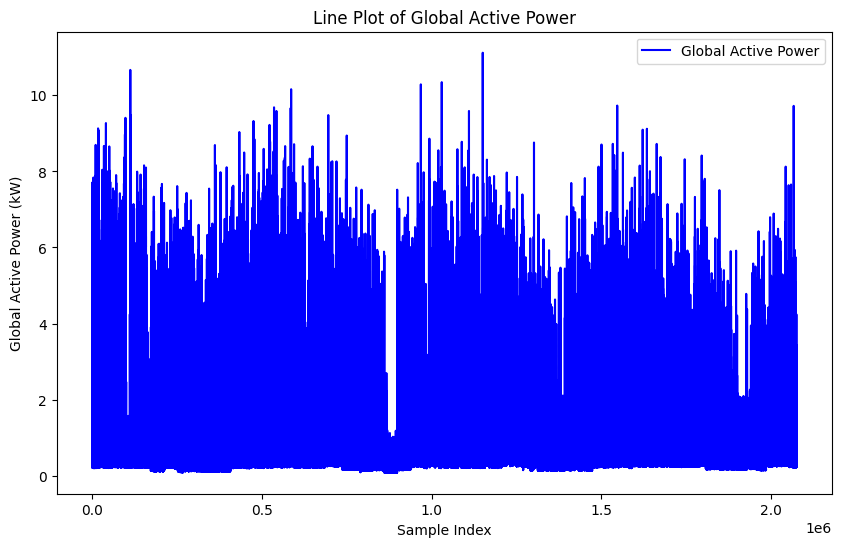

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Global_active_power"], label="Global Active Power", color="blue")
plt.title("Line Plot of Global Active Power")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()

# **OBSERVATION**

The line plot shows that Global Active Power fluctuates widely, with values generally between 0 and 8 kW, but with periodic spikes exceeding 10 kW. There appear to be cyclic patterns, suggesting recurring periods of higher and lower power usage, possibly aligned with daily or weekly routines.

### **HISTOGRAM**

### Q2 . Displays the distribution of "Voltage" values.

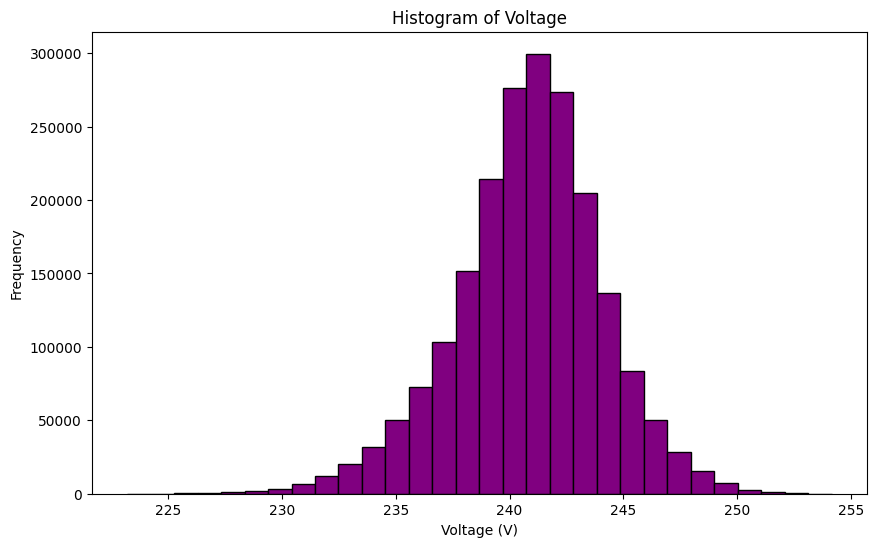

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["Voltage"], bins=30, color="purple", edgecolor="black")
plt.title("Histogram of Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Frequency")
plt.show()

# **OBSERVATION**

* This histogram of Voltage shows a nearly symmetrical, bell-shaped distribution centered around 240 volts.

* Most voltage values are concentrated between 235V and 245V, with the highest frequency around 240V, indicating that this is the typical operating voltage. The distribution tapers off on both ends, with very few instances of voltage below 230V or above 250V.

* This suggests that voltage remains relatively stable around 240V, with only minor deviations.

* The shape of the distribution indicates a normal, consistent supply of voltage.

## **BAR PLOT**

### Q3 . Illustrates the mean values of each "Sub Metering" variable.

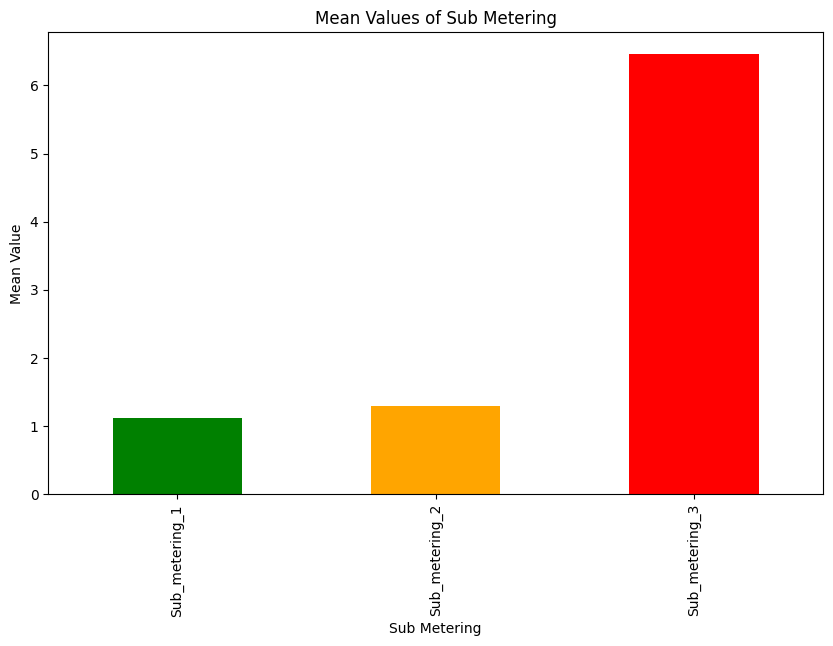

In [ ]:
mean_values = df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].mean()
plt.figure(figsize=(10, 6))
mean_values.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Mean Values of Sub Metering")
plt.xlabel("Sub Metering")
plt.ylabel("Mean Value")
plt.show()

# **OBSERVATION**

* This bar plot shows the mean values of Sub Metering across three categories. Sub_metering_3 has the highest average consumption, significantly exceeding that of Sub_metering_1 and Sub_metering_2.

* This suggests that the devices or areas represented by Sub_metering_3 consistently consume more energy than the other two sub-metered areas.

* Both Sub_metering_1 and Sub_metering_2 have relatively similar mean values, which are much lower than that of Sub_metering_3.

* This indicates a likely difference in the type or intensity of power usage between these sub-metered areas.

## **SCATTER PLOT**

### Q4 . Highlights the relationship between "Global Active Power" and "Global Intensity".

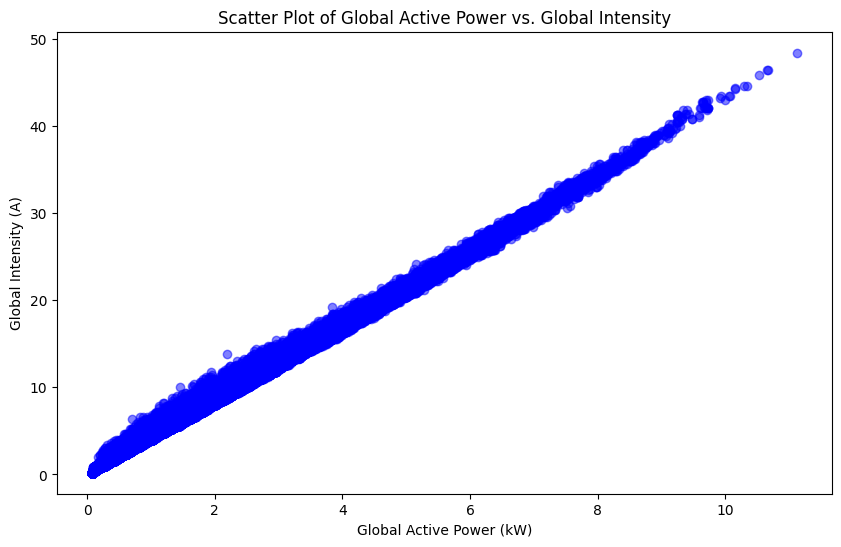

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Global_active_power"], df["Global_intensity"], alpha=0.5, color="blue")
plt.title("Scatter Plot of Global Active Power vs. Global Intensity")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Global Intensity (A)")
plt.show()

# **OBSERVATION**



* This scatter plot shows a clear, positive linear relationship between Global Active Power and Global Intensity.

* As Global Active Power (in kW) increases, Global Intensity (in A) also increases in a closely proportional manner.

* The tight clustering of points along the line indicates a strong correlation, suggesting that as more active power is consumed, the current intensity also rises consistently.

* This relationship is expected in electrical systems, as power is directly proportional to current at a given voltage.

In [10]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# **PAIR PLOT**

# Q5. Create a pairplot for the given dataset.

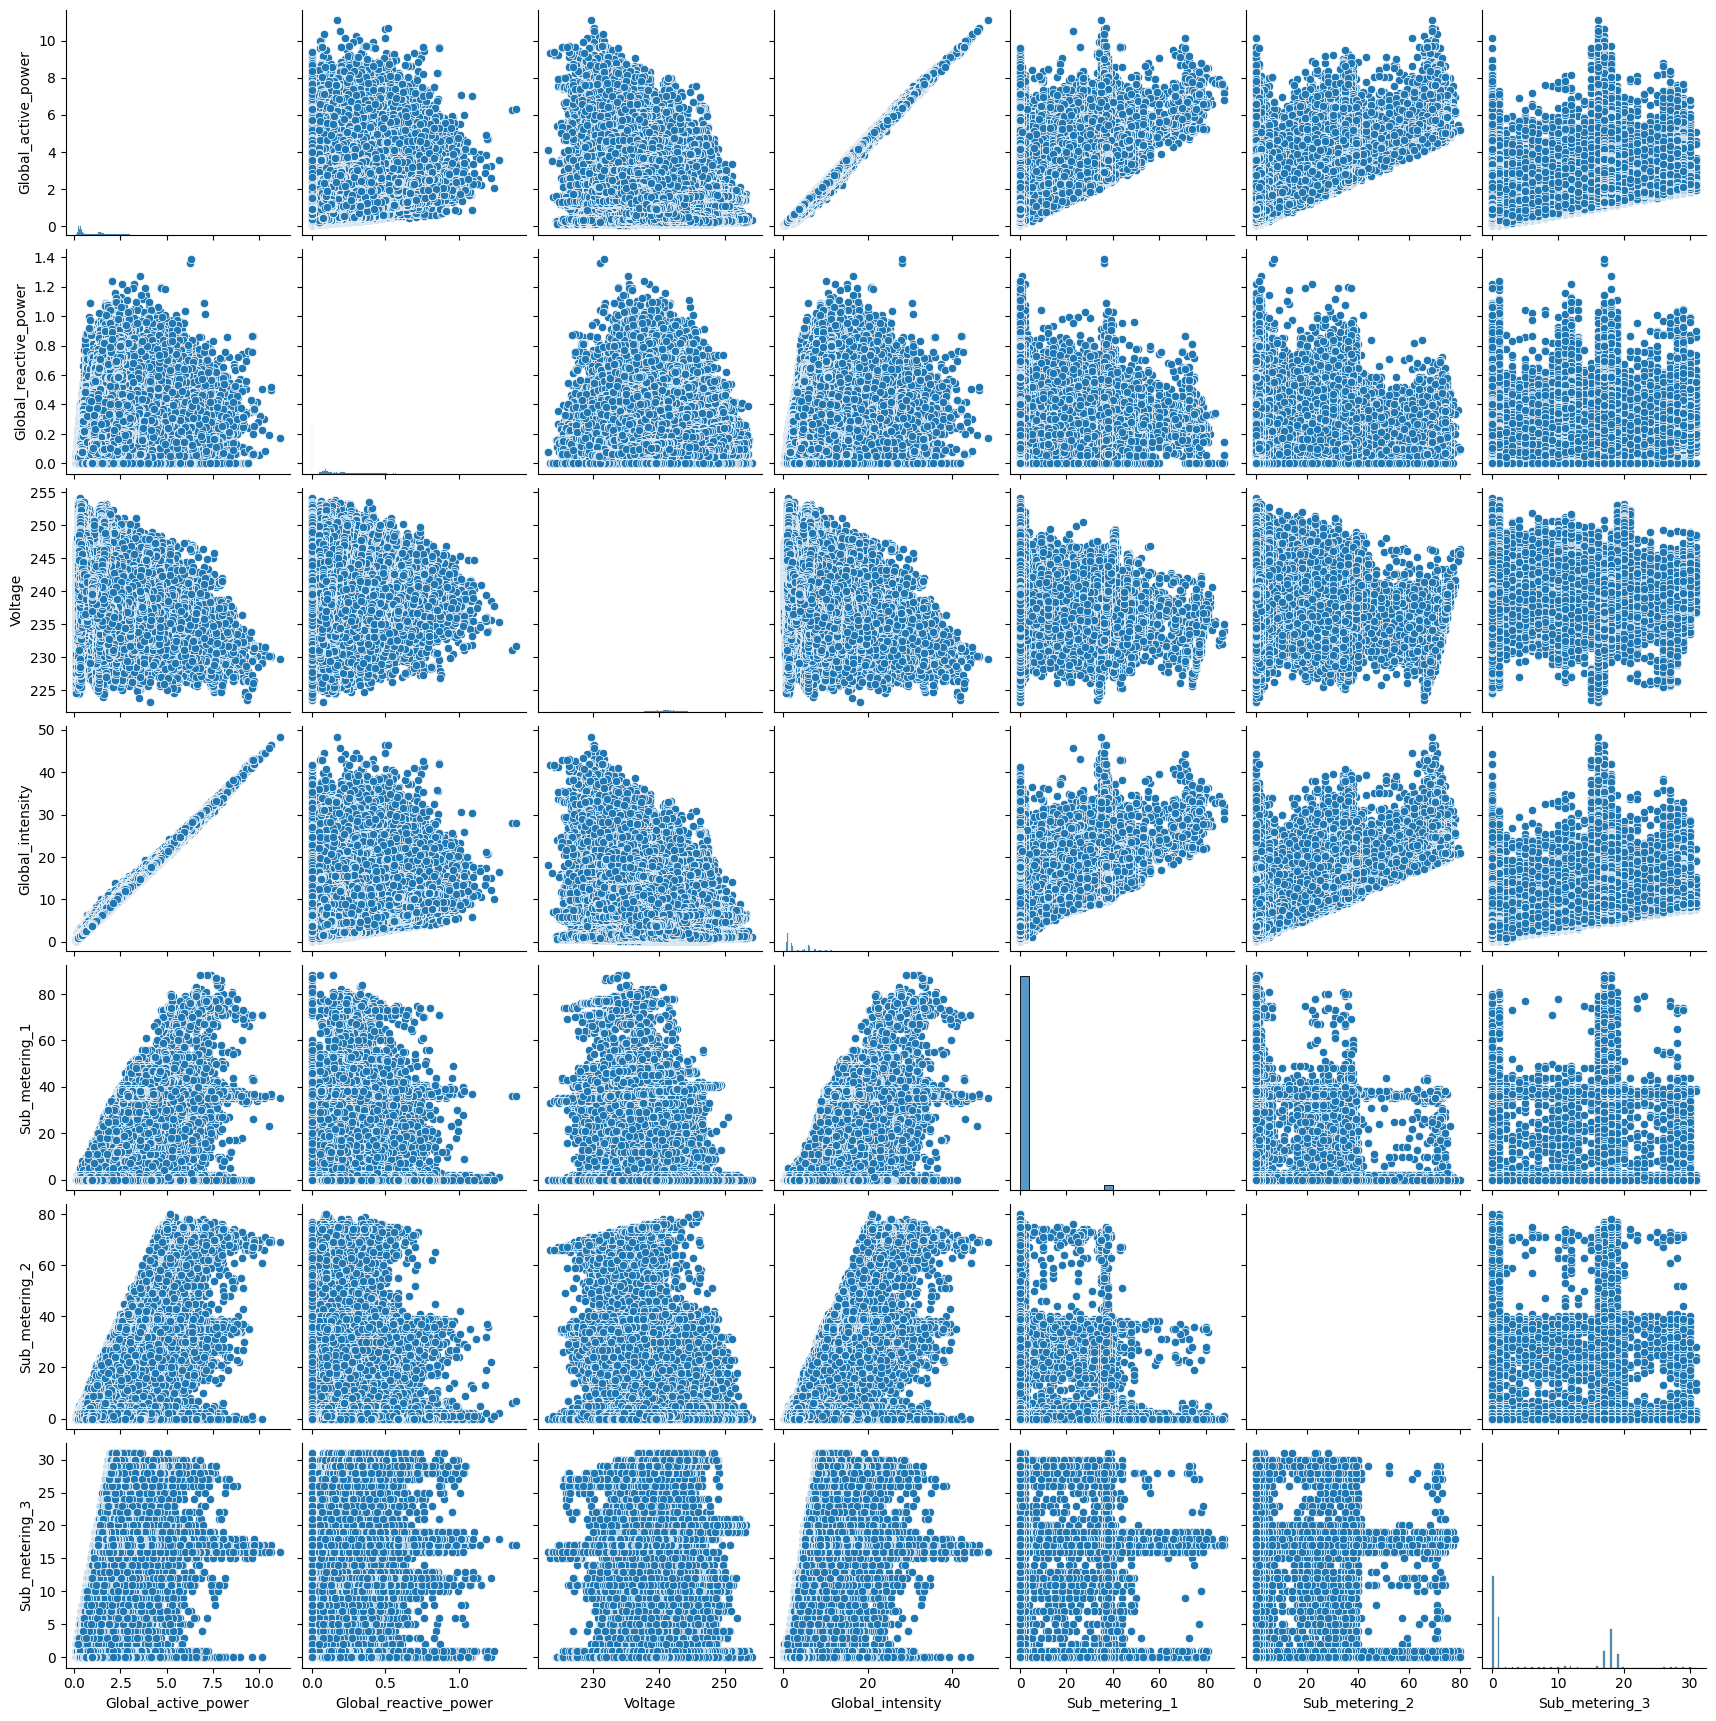

In [ ]:
sns.pairplot(df)

# **OBSERVATION**

* There's a strong positive linear correlation between Global_active_power and Global_intensity, as expected, since both relate to power consumption.

* Voltage does not appear to have a clear correlation with most other variables, indicating it might be relatively independent in this dataset.

* The Sub_metering_1, Sub_metering_2, and Sub_metering_3 variables show unique patterns and distributions, with Sub_metering_3 having a concentration at lower values.

* There is no strong linear correlation between Global_reactive_power and most other variables, though some clusters are visible in specific scatter plots.

# **5. DATA ENCODING**

### 1. Convert date and time from string to date(Year, Month, Day) & time(Hours, minutes) format.

In [11]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Extracting  Year, Month, Day, Hour, and Minute
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute

In [ ]:
df.info()
# After converting the date and time from String to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(2)
memory usage: 197.9+ MB


### 2. Find whether the day is a holiday or not (0 = not holiday, 1= holiday) and if there is sunlight during the time given in the dataset

In [12]:
import datetime as dt

# Function to check if a given date is a holiday (weekend in this case)
def is_holiday(date):
    # Extract year, month, and day from the date string
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    # Check if the day is Saturday (5) or Sunday (6)
    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0  # Weekend = holiday
    else:
        return 0.0  # Weekday = not a holiday

# Apply transformations to the DataFrame
for data in [df]:
    # Apply holiday function
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))

    # Ensure Time column is treated as string and handle missing values
    data['Light'] = data['Time'].apply(
        lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0
    )

    # Convert Time to fraction of the day, handle missing values
    data['Time'] = data['Time'].apply(
        lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else None
    )

# Display the modified DataFrame
print(df.head())


         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  0.725000                4.216                  0.418   234.84   
1  16/12/2006  0.725694                5.360                  0.436   233.63   
2  16/12/2006  0.726389                5.374                  0.498   233.29   
3  16/12/2006  0.727083                5.388                  0.502   233.74   
4  16/12/2006  0.727778                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  Year  Month  Day  Hour  Minute  Is_holiday  Light  
0 2006-12-16 17:2

# **6. Comparing  different ML Models with their accuracies and RMSE's**

In [18]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=385dc956-8643-42ff-8b2d-17253196f6ff
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 207MB/s]


In [19]:
df1 = pd.read_csv('/content/household_power_consumption.txt',sep=";")

In [20]:
df1['Global_active_power'] = pd.to_numeric(df1['Global_active_power'], errors='coerce')
df1['Global_reactive_power'] = pd.to_numeric(df1['Global_reactive_power'], errors='coerce')
df1['Voltage'] = pd.to_numeric(df1['Voltage'], errors='coerce')
df1['Global_intensity'] = pd.to_numeric(df1['Global_intensity'], errors='coerce')
df1['Sub_metering_1'] = pd.to_numeric(df1['Sub_metering_1'], errors='coerce')
df1['Sub_metering_2'] = pd.to_numeric(df1['Sub_metering_2'], errors='coerce')

In [21]:
df1.fillna(0, inplace=True)

In [22]:
df1.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [23]:
null_rows = df1[df1.isnull().any(axis=1)]

In [24]:
null_rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [25]:
df1.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [26]:
df1['DateTime'] = pd.to_datetime(df1['Date']+' '+df1['Time'])
df1['Year'] = df1['DateTime'].dt.year
df1['Month'] = df1['DateTime'].dt.month
df1['Day'] = df1['DateTime'].dt.day
df1['Hour'] = df1['DateTime'].dt.hour
df1['Minute'] = df1['DateTime'].dt.minute #df.head()

In [27]:
df1.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25


In [28]:
def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df1]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light'] = data['Time'].apply(lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time'] = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else 0)

In [29]:
newdf = df1.drop(['Date', 'DateTime', 'Time'], axis=1) # only numeric values
# should be in your model dataset.

X = newdf.drop('Global_active_power', axis=1)
y = newdf['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
1347712,0.000,244.74,0.8,0.0,0.0,0.0,2009,7,9,15,16,0.0,1
378408,0.000,240.60,0.6,0.0,0.0,0.0,2007,9,5,12,12,0.0,1
280143,0.098,242.40,1.0,0.0,0.0,0.0,2007,6,29,6,27,0.0,1
670820,0.086,243.92,1.4,0.0,0.0,0.0,2008,3,26,13,44,0.0,1
1940013,0.098,244.25,1.8,0.0,1.0,1.0,2010,8,24,22,57,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.256,241.69,1.6,0.0,1.0,0.0,2007,6,14,17,2,0.0,1
1414414,0.230,241.14,15.6,38.0,0.0,12.0,2009,8,24,22,58,0.0,0
131932,0.232,239.67,10.0,9.0,0.0,0.0,2007,3,18,8,16,1.0,1
671155,0.258,235.99,8.6,0.0,3.0,0.0,2008,3,26,19,19,0.0,0


# **Basic Machine Learning Models**

* Linear Regression
* Lasso Regression
* Ridge Regression
* Logistic Regression

## Root Mean Square error values (RMSE)

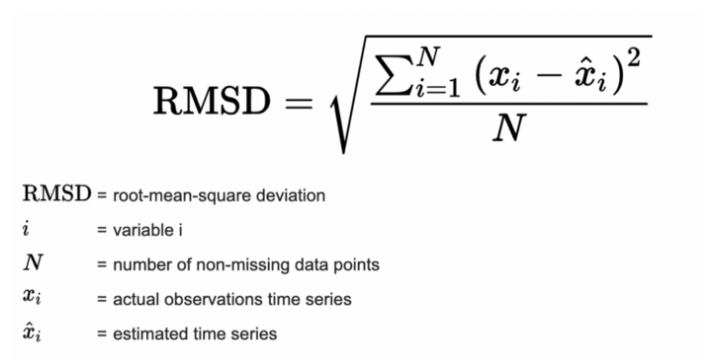

In [ ]:
# Global active power = GAP
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) # fit is for model training
linear_reg_predictions = linear_reg.predict(X_test) # predict values for GAP
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100


4.208169357810706

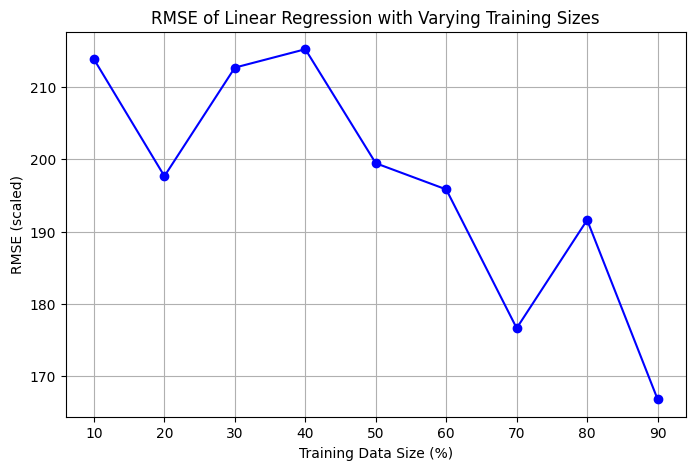

In [ ]:


# Generate synthetic data for demonstration (replace with your dataset)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Target with noise

# Prepare to store RMSE values
rmse_values = []
train_sizes = np.linspace(0.1, 0.9, 9)  # Vary training data proportion

# Iterate over different training data sizes
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Train Linear Regression model
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Predict and compute RMSE
    y_pred = linear_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse * 100)  # Scale RMSE

# Plot RMSE values
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * 100, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE of Linear Regression with Varying Training Sizes')
plt.xlabel('Training Data Size (%)')
plt.ylabel('RMSE (scaled)')
plt.grid(True)
plt.show()


In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100

23.161215174430872

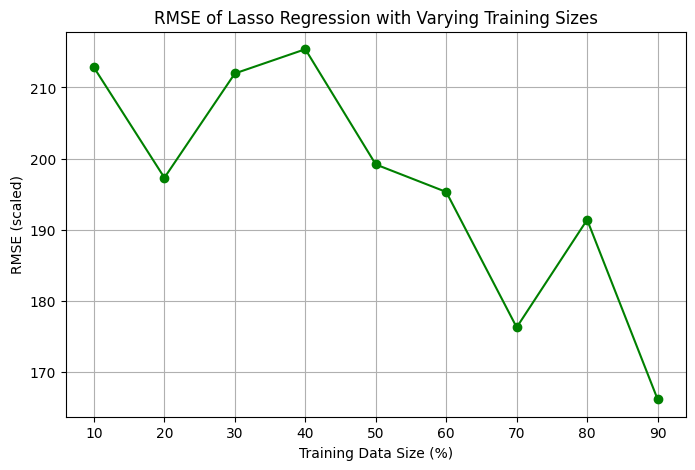

In [ ]:

# Generate synthetic data for demonstration (replace with your dataset)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Target with noise

# Prepare to store RMSE values
lasso_rmse_values = []
train_sizes = np.linspace(0.1, 0.9, 9)  # Vary training data proportion

# Iterate over different training data sizes
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Train Lasso Regression model
    lasso_reg = Lasso(alpha=0.1)  # Adjust alpha as needed
    lasso_reg.fit(X_train, y_train)

    # Predict and compute RMSE
    y_pred = lasso_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    lasso_rmse_values.append(rmse * 100)  # Scale RMSE

# Plot RMSE values for Lasso Regression
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * 100, lasso_rmse_values, marker='o', linestyle='-', color='g')
plt.title('RMSE of Lasso Regression with Varying Training Sizes')
plt.xlabel('Training Data Size (%)')
plt.ylabel('RMSE (scaled)')
plt.grid(True)
plt.show()


In [ ]:
Rigid_reg = Ridge()
Rigid_reg.fit(X_train, y_train)
Rigid_reg_predictions = Rigid_reg.predict(X_test)
Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))
Rigid_reg_rmse*100

4.208169376805944

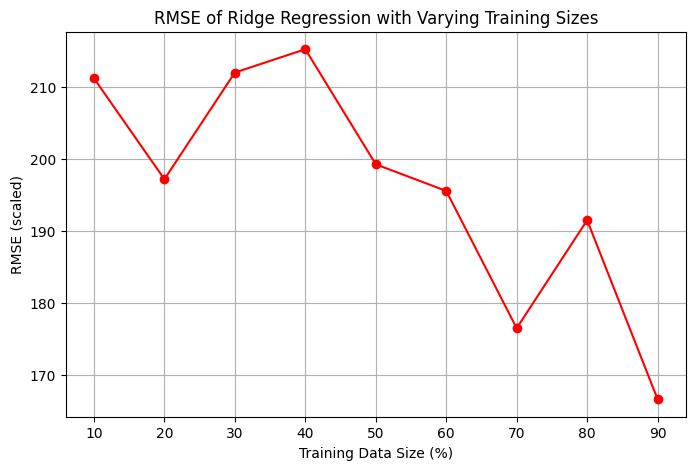

In [ ]:
# Generate synthetic data for demonstration (replace with your dataset)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Target with noise

# Prepare to store RMSE values
ridge_rmse_values = []
train_sizes = np.linspace(0.1, 0.9, 9)  # Vary training data proportion

# Iterate over different training data sizes
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Train Ridge Regression model
    ridge_reg = Ridge(alpha=1.0)  # Adjust alpha as needed
    ridge_reg.fit(X_train, y_train)

    # Predict and compute RMSE
    y_pred = ridge_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    ridge_rmse_values.append(rmse * 100)  # Scale RMSE

# Plot RMSE values for Ridge Regression
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * 100, ridge_rmse_values, marker='o', linestyle='-', color='r')
plt.title('RMSE of Ridge Regression with Varying Training Sizes')
plt.xlabel('Training Data Size (%)')
plt.ylabel('RMSE (scaled)')
plt.grid(True)
plt.show()


In [ ]:
"""clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100"""


# will show error as Y is not discrete

'clf=LogisticRegression()\nclf.fit(X_train, y_train)\nLogistic_pred = clf.predict(X_test)\nLog_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))\nLog_reg_rmse*100'

# **Accuracies for ML Models**

In [ ]:
lasso_reg.score(X_test, y_test)*100

95.20733089564428

In [ ]:
Rigid_reg.score(X_test, y_test)*100

99.84178735683008

In [ ]:
linear_reg.score(X_test, y_test)*100

99.84178735825839

#### LASSO REGRESSION ACCURACY AND ITS PLOTTING

In [ ]:
# Calculate accuracy for Lasso regression on test data
lasso_accuracy = lasso_reg.score(X_test, y_test) * 100
print(f"Lasso Regression Accuracy: {lasso_accuracy:.2f}%")


Lasso Regression Accuracy: 95.21%


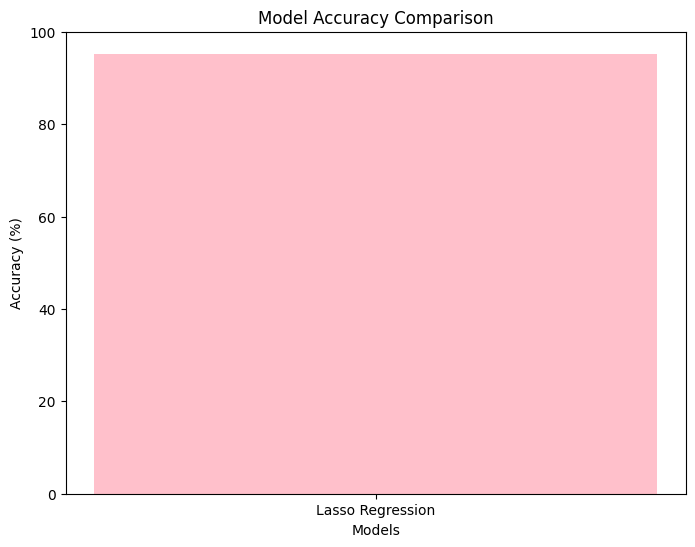

In [ ]:
model_accuracies = {
    "Lasso Regression": lasso_accuracy,
}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='pink')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()


#### RIDGE REGRESSION ACCURACY AND ITS PLOTTING

In [ ]:
# Calculate accuracy for Ridge regression on test data
ridge_accuracy = Rigid_reg.score(X_test, y_test) * 100
print(f"Ridge Regression Accuracy: {ridge_accuracy:.2f}%")


Ridge Regression Accuracy: 99.84%


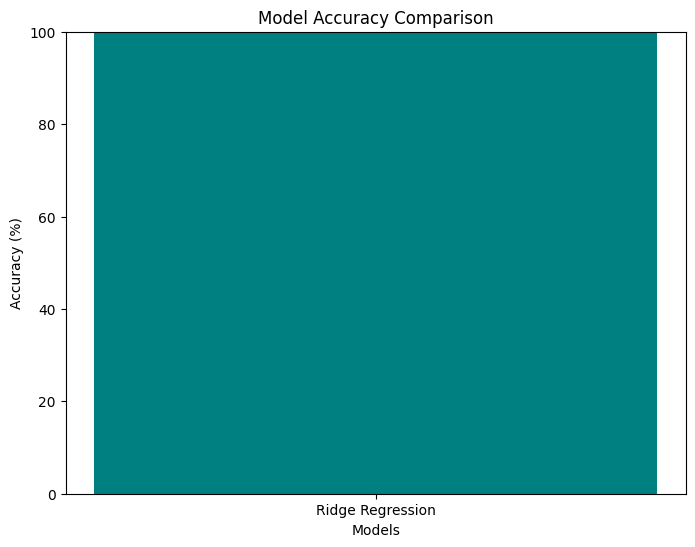

In [ ]:
model_accuracies = {
    "Ridge Regression": ridge_accuracy
}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['teal', 'skyblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()


#### LINEAR REGRESSION ACCURACY AND ITS PLOTTING

In [ ]:
# Calculate accuracy for Linear Regression on test data
linear_accuracy = linear_reg.score(X_test, y_test) * 100
print(f"Linear Regression Accuracy: {linear_accuracy:.2f}%")


Linear Regression Accuracy: 99.84%


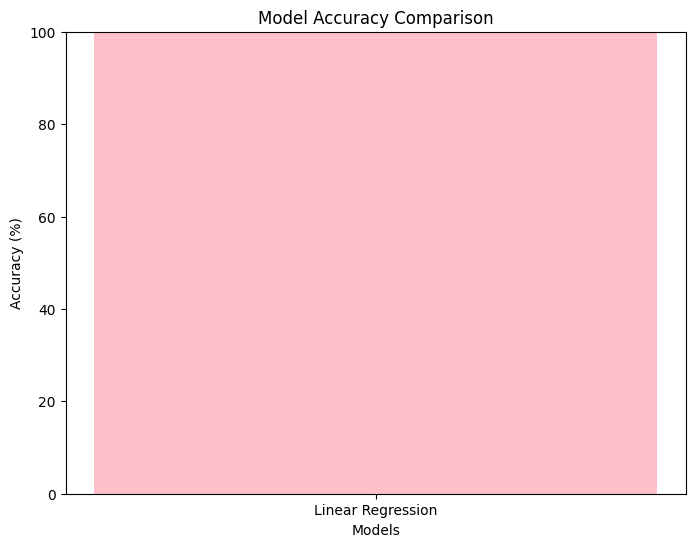

In [ ]:

model_accuracies = {    "Linear Regression": linear_accuracy
}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=[ 'pink'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()


# **COMPARISON BETWEEN THE DIFFERENT ML MODELS**

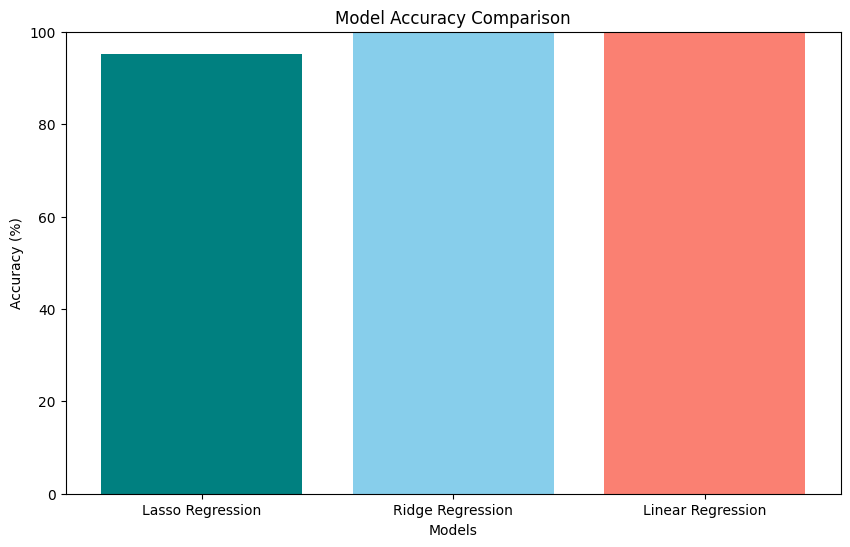

In [ ]:
model_accuracies = {
    "Lasso Regression": lasso_accuracy,
    "Ridge Regression": ridge_accuracy,
    "Linear Regression": linear_accuracy
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['teal', 'skyblue', 'salmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()


From this graph, it appears that all three models (Lasso, Ridge, and Linear Regression) have high accuracy, close to or around 100%. This suggests that the data is well-suited for linear modeling.

# **OBSERVATION**

* High Accuracy Across Models:  The high accuracy of all models indicates that the dataset might be relatively simple, with linear relationships that the models capture well.

* Regularization Impact: Lasso and Ridge, which apply regularization, perform similarly to Linear Regression, suggesting minimal overfitting.

* Model Choice: Since all models yield similar performance, Linear Regression might be preferable for simplicity unless feature selection (Lasso) or slight improvements (Ridge) are needed.

* Data Suitability: The high accuracy may also imply that the features chosen for the model are strong predictors of the target variable.









# **ARIMA : Time series forcasting**

d, p and q are the order we mention in the function

* p is the number of autoregressive terms

* d is the number of nonseasonal differences needed for stationarity

 * q is the number of lagged forecast errors in the prediction equation.

In [42]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.3 MB/s eta 0:00:00


In [43]:
import statsmodels
print(statsmodels.__version__)


0.14.4


In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(y_train, order=(5,1,0)) # Example order, you might need to tune this
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [45]:
print("RMSE:", rmse)

RMSE: 1.5390169501910018


In [31]:
!python -m pip install prophet

In [32]:
from prophet import Prophet

In [33]:
data = df1.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})
data.drop(['Date', 'DateTime', 'Time'], axis=1, inplace = True)

In [34]:
data.y.value_counts()

,count
y,
0.000,25979
0.218,9565
0.216,9363
0.322,9350
0.324,9304
...,...
7.102,1
8.302,1
8.468,1


In [36]:
df1.Global_active_power.value_counts()

,count
Global_active_power,
0.000,25979
0.218,9565
0.216,9363
0.322,9350
0.324,9304
...,...
7.102,1
8.302,1
8.468,1


In [37]:
train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7) # weekly prediction
future_dates_30days = model.make_future_dataframe(periods=30) # monthly prediction

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cxnj908/8w49d7rt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cxnj908/860pa5j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87652', 'data', 'file=/tmp/tmp9cxnj908/8w49d7rt.json', 'init=/tmp/tmp9cxnj908/860pa5j4.json', 'output', 'file=/tmp/tmp9cxnj908/prophet_model2j0zz7pn/prophet_model-20241127043048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:52:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


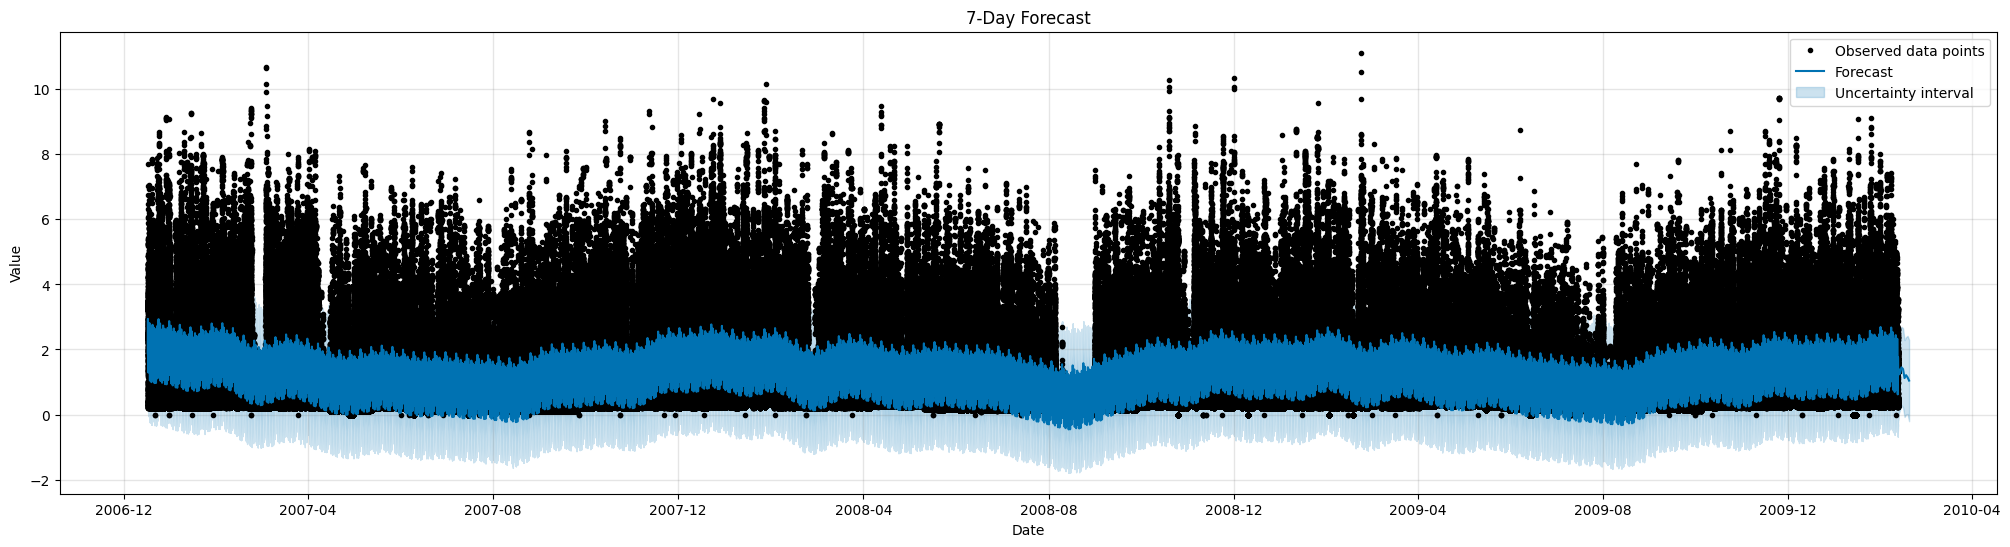

In [38]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



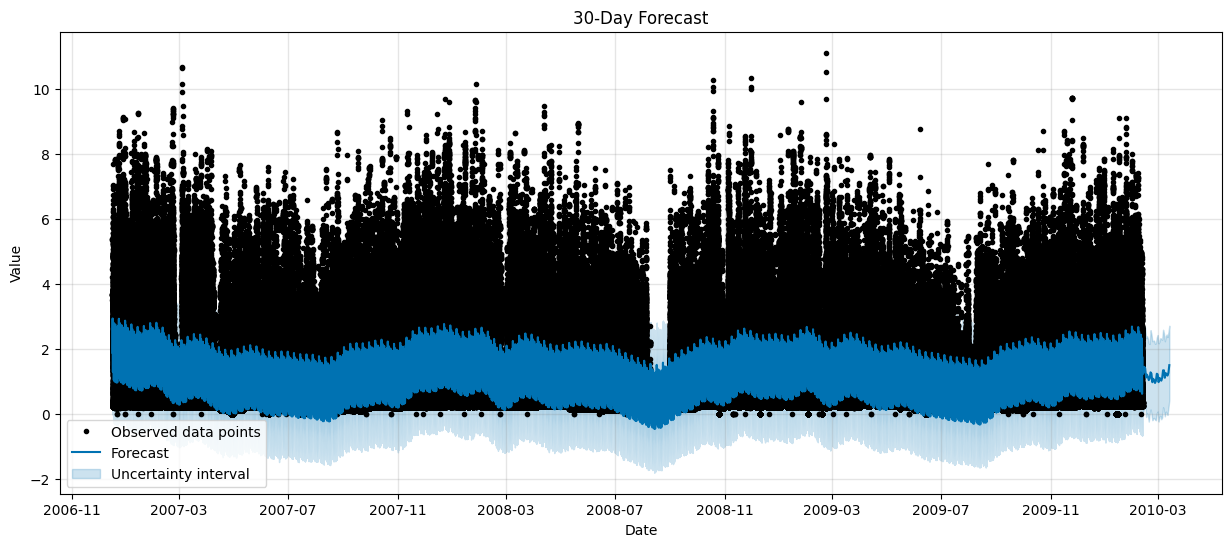

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#**COMBINED OBSERVATION  FOR BOTH PROPHET:**

*The forecasts accurately capture the overall trends in energy consumption, providing reliable predictions for both short-term and long-term periods.

*The 7-day forecast is more precise, while the 30-day forecast smooths fluctuations but loses some accuracy in capturing short-term spikes.

*High variability and sharp spikes in energy consumption are not fully captured by the model, highlighting its limitation in handling extreme outliers.

*The uncertainty intervals widen over time, indicating increased prediction uncertainty for longer forecast horizons.

*Prophet effectively models general trends and seasonality but may require further tuning to handle irregular patterns and high-frequency spikes.

In [40]:
predictions_30days.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

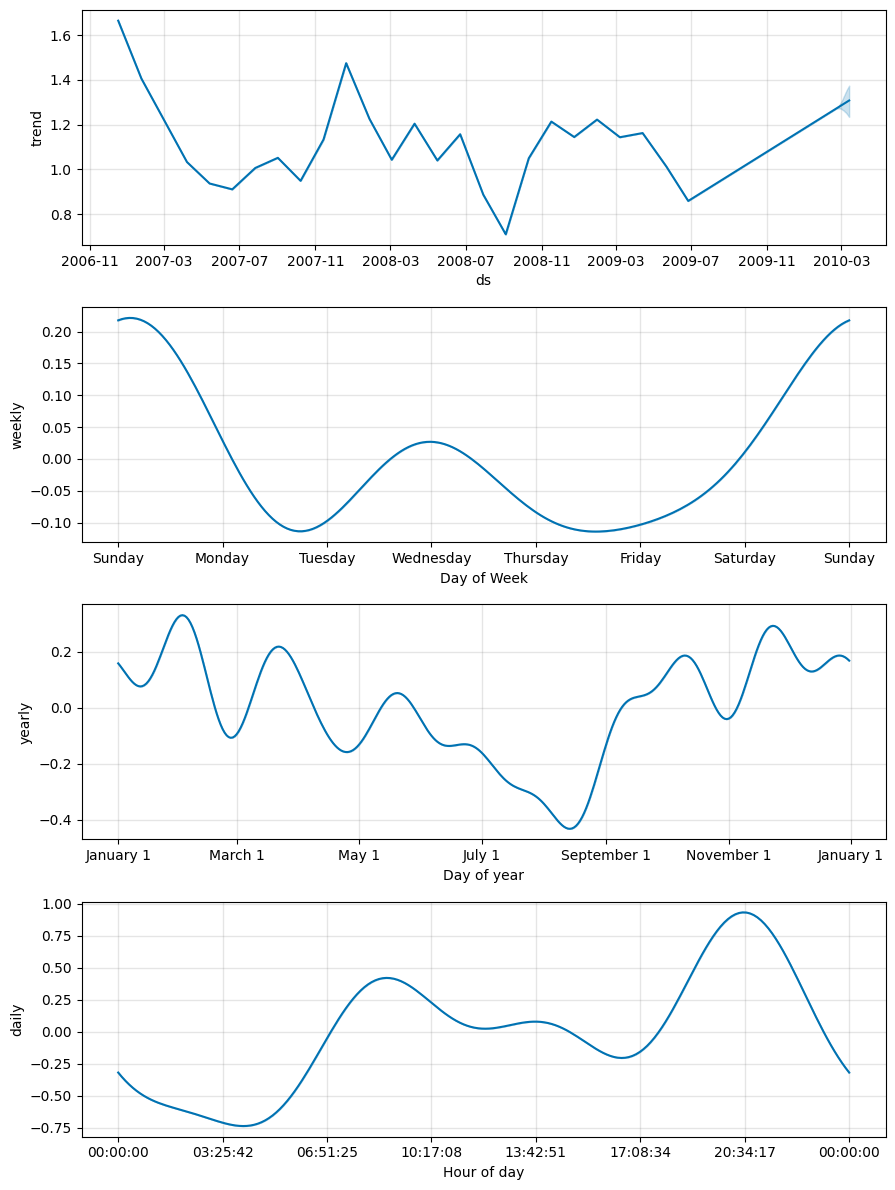

In [41]:
model.plot_components(predictions_30days);